In [1]:
from collections import deque
import matplotlib.pyplot as plt
import math


class State:
    OPERATORS = ["up", "down", "left", "right"]

    # Checks to see if the state is solvable
    def is_solvable(self):
        inv = 0
        lst = self.flatten()
        for i in range(self.N * self.N):
            for j in range(i + 1, self.N * self.N):
                if lst[i] != 0 and lst[j] != 0 and lst[i] > lst[j]:
                    inv += 1
        return inv % 2 == 0

    # Generates an id, which is just a string representation of the grid
    def __init__(self, grid, parent=None):
        self.N = len(grid)
        self.grid = grid
        self.parent = parent
        self.id = "".join([str(i) for i in self.flatten()])

    # 2D list to 1D list
    def flatten(self):
        return [i for k in self.grid for i in k]

    # 1D list to 2D list
    def to_grid(lst, N):
        return [lst[i : i + N] for i in range(0, len(lst), N)]

    # check if a state is complete
    def is_solved(self):
        flat = self.flatten()
        return flat == sorted(flat)
        

    # Trace the parents until the beginning
    def path(self):
        node = self
        path = []
        while node:
            path.append(node)
            node = node.parent
        return path[::-1]

    # Swap positions of two cells based on direction, if possible
    def move(state, direction):
        N = state.N
        lst_state = state.flatten()
        i = lst_state.index(0)
        # Move 4 directions
        if direction == "up" and i - N >= 0:
            lst_state[i - N], lst_state[i] = lst_state[i], lst_state[i - N]
        elif direction == "down" and i + N < N * N:
            lst_state[i + N], lst_state[i] = lst_state[i], lst_state[i + N]
        elif direction == "left" and (i - 1) // N == i // N:
            lst_state[i - 1], lst_state[i] = lst_state[i], lst_state[i - 1]
        elif direction == "right" and (i + 1) // N == i // N:
            lst_state[i + 1], lst_state[i] = lst_state[i], lst_state[i + 1]
        else:
            return None
        return State.to_grid(lst_state, N)

    def get_children(self):
        children = [State.move(self, d) for d in State.OPERATORS]
        children = list(filter(None, children))
        return [State(child, self) for child in children]


In [2]:
# Plot the different states
def visualize(route):
    rows = max(2,math.ceil(len(route) / 4))
    fig, ax = plt.subplots(rows, 4, figsize=(12, rows*3))

    for i in range(rows * 4):
        ax[i // 4, i % 4].axis("off")
        ax[i // 4, i % 4].axis("tight")
        ax[i // 4, i % 4].set_aspect("equal")
        if i in range(len(route)):
            if i == 0:
                ax[i // 4, i % 4].set_title(f"Initial State")
            elif i == len(route) - 1:
                ax[i // 4, i % 4].set_title("Goal State")
            else:
                ax[i // 4, i % 4].set_title(f"State #{i}")
            N = len(route[i].grid)
            tab = ax[i // 4, i % 4].table(
                cellText=route[i].grid,
                cellLoc="center",
                loc="center",
                colWidths=[0.3] * N,
            )
            tab.set_fontsize(15)

            for j in range(N):
                for k in range(N):
                    cell = tab[j, k]
                    cell.set_height(0.3)
                    if cell._text.get_text() == "0":
                        cell._text.set_text("")
                        cell.set_facecolor("#FFFF8F")

    plt.show()


Explored Nodes: 40875


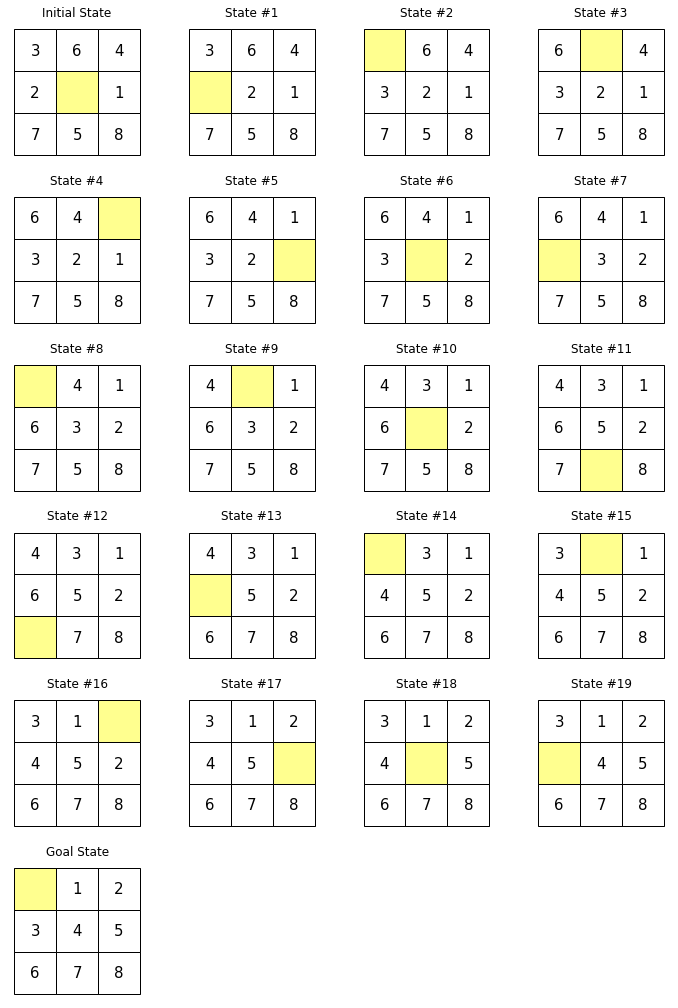

In [3]:
init_state = [[3,6,4],
              [2,0,1],
              [7,5,8]]


init_state = State(init_state)

# Check if there's even a solution
if not init_state.is_solvable():
    print("This puzzle is not solvable.")
else:
    # The actual solution
    que = deque([init_state])
    explored = set()
    route = []
    found = False

    while que and not found:
        current = que.popleft()
        explored.add(current.id)
        for child in current.get_children():
            if child.id not in explored and child not in que:
                if child.is_solved():
                    route = child.path()
                    found = True
                que.append(child)

    print(f"Explored Nodes: {len(explored)}")
    visualize(route)
